<a href="https://colab.research.google.com/github/salmanromeo/MAE_3403_Computer_Methods_in_Analysis_and_Design/blob/main/lecture_4_Numerical_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Consider the integral:
\begin{align}
  \int_1^{π} \frac{sinx}{2x^{3}} \;dx
    \end{align}
#####**1. Write a code to numerically evaluate this integral using the trapezoidal rule, Simpson’s rule, trapezoidal rule with end-correction and using a default scipy integrate functions.**
#####Trapezoidal rule for the entire domain with uniform mesh spacing:
\begin{align}
  I \approx \frac{h}{2} (f_0 + 2\sum_{j=1}^{n-1} f_j + f_n)
    \end{align}
#####Simpson’s rule for the entire domain with uniform mesh spacing:
\begin{align}
  I \approx \frac{h}{3} (f_0 + 4\sum_{j=1 (odd)}^{n-1} f_j + 2\sum_{j=2 (even)}^{n-2} f_j + f_n)
    \end{align}
#####Trapezoidal rule with end-correction for the entire domain with uniform mesh spacing:
\begin{align}
  I \approx \frac{h}{2} (f_0 + 2\sum_{j=1}^{n-1} f_j + f_n) - \frac{h^2}{12} (f'(b) - f'(a))
    \end{align}
#####**2. Use the ‘exact’ solution, I = 0.1985572988, to evaluate these quadrature techniques.**
#####**3. Make a log–log plot of the error (%) vs. n and discuss the accuracy of the method. Take n = 8, 16, 32, ...**
#####**4. Discuss the log–log plot for ‘exact’ solution, I = 0.1985572988 and I = 0.0459847541297071.**

In [1]:
import numpy as np
from scipy.integrate import quad

# Define the integrand function
def f(x):
    return np.sin(x)/(2*x**3)

# Define the derivative of function for trapezoidal rule with end-correction formulation
def dfdx(x):
    return (x*np.cos(x) - 3*np.sin(x))/(2*x**4)

# Define the integration limits
a = 1
b = np.pi

# Define the exact solution obtained by symbolic integration
exact_sol = 0.1985572988

# Define the number of points for the trapezoidal and Simpson's rules
n_trap = 8
n_simp = 8

# Define the x values for the trapezoidal rule with end-correction
x = np.linspace(a, b, n_trap+1)
x[0] = a
x[-1] = b

# Evaluate the integral using the trapezoidal rule
h = (b-a)/n_trap
trap = h/2 * (f(a) + 2*np.sum(f(x[1:-1])) + f(b))

# Evaluate the integral using the Simpson's rule
h = (b-a)/n_simp
x_simp = np.linspace(a, b, n_simp+1)
simp = h/3 * (f(a) + 4*np.sum(f(x_simp[1:-1:2])) + 2*np.sum(f(x_simp[2:-2:2])) + f(b))

# Evaluate the integral using the trapezoidal rule with end-correction
h = (b-a)/n_trap
x_ec = np.linspace(a, b, n_trap+1)
ec = h/2 * (f(a) + 2*np.sum(f(x_ec[1:-1])) + f(b)) - h**2/12 * (dfdx(b) - dfdx(a))

# Evaluate the integral using the quad function
quad_int, quad_err = quad(f, a, b)

# Print the results
print("---------------------------------------------------------------------")
print(f"Trapezoidal rule: {trap}")
print(f"Simpson's rule: {simp}")
print(f"Trapezoidal rule with end-correction: {ec}")
print(f"scipy.integrate.quad: {quad_int}")

# Evaluate error from exact solution
trap_err = np.abs((trap - exact_sol)/(exact_sol))*100
simp_err = np.abs((simp - exact_sol)/(exact_sol))*100
ec_err = np.abs((ec - exact_sol)/(exact_sol))*100

# Print the results
print("---------------------------------------------------------------------")
print(f"Trapezoidal rule error: {round(trap_err,6)}%")
print(f"Simpson's rule error: {round(simp_err,6)}%")
print(f"Trapezoidal rule with end-correction error: {round(ec_err,6)}%")
print(f"scipy.integrate.quad error: {round(quad_err,6)}%")


---------------------------------------------------------------------
Trapezoidal rule: 0.20430414725246882
Simpson's rule: 0.1988344767148405
Trapezoidal rule with end-correction: 0.19847599366546845
scipy.integrate.quad: 0.19855729881113593
---------------------------------------------------------------------
Trapezoidal rule error: 2.894302%
Simpson's rule error: 0.139596%
Trapezoidal rule with end-correction error: 0.040948%
scipy.integrate.quad error: 0.0%


#####We see that the higher order Simpson’s rule and trapezoidal with end-correction outperform the plain trapezoidal rule.

[   8   16   32   64  128  256  512 1024 2048]


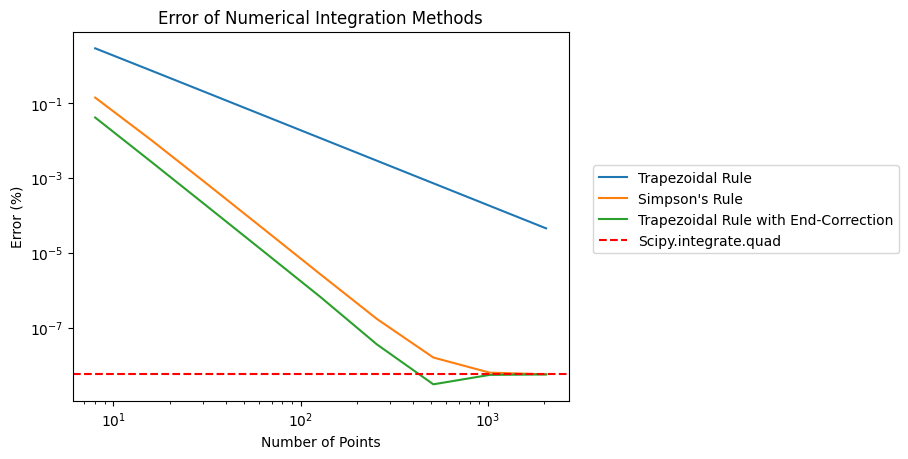

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define the integrand function
def f(x):
    return np.sin(x)/(2*x**3)

# Define the derivative of function for trapezoidal rule with end-correction formulation
def dfdx(x):
    return (x*np.cos(x) - 3*np.sin(x))/(2*x**4)

# Define the integration limits
a = 1
b = np.pi

# Define the exact solution obtained by symbolic integration
exact_sol = 0.1985572988
# exact_sol = 0.0459847541297071

# Define the number of points for the trapezoidal rule and Simpson's rule
print(2**np.arange(3, 12))    # n = 8, 16, 32, ... 
n_trap = 2**np.arange(3, 12)
n_simp = 2**np.arange(3, 12)
n_ec   = 2**np.arange(3, 12)

# Evaluate the integral using the trapezoidal rule and Simpson's rule
err_trap = []
err_simp = []
err_ec   = []
for n in n_trap:
    x = np.linspace(a, b, n+1)
    h = (b-a)/n
    int_trap = h/2 * (f(a) + 2*np.sum(f(x[1:-1])) + f(b))
    err_trap.append(np.abs(int_trap - exact_sol)/exact_sol * 100)
for n in n_simp:
    x = np.linspace(a, b, n+1)
    h = (b-a)/n
    int_simp = h/3 * (f(a) + 4*np.sum(f(x[1:-1:2])) + 2*np.sum(f(x[2:-1:2])) + f(b))
    err_simp.append(np.abs(int_simp - exact_sol)/exact_sol * 100)
for n in n_ec:
    x = np.linspace(a, b, n+1)
    h = (b-a)/n
    ec = h/2 * (f(a) + 2*np.sum(f(x[1:-1])) + f(b)) - h**2/12 * (dfdx(b) - dfdx(a))
    err_ec.append(np.abs(ec - exact_sol)/exact_sol * 100)

# Evaluate the integral using scipy.integrate.quad
int_scipy, err_scipy = integrate.quad(f, a, b)
err_scipy = np.abs(int_scipy - exact_sol)/exact_sol * 100

# Plot the results
plt.loglog(n_trap, err_trap, label='Trapezoidal Rule')
plt.loglog(n_simp, err_simp, label="Simpson's Rule")
plt.loglog(n_ec, err_ec, label="Trapezoidal Rule with End-Correction")
plt.axhline(y=err_scipy, color='red', linestyle='--', label='Scipy.integrate.quad')
plt.xlabel('Number of Points')
plt.ylabel('Error (%)')
plt.title('Error of Numerical Integration Methods')
plt.legend(loc=(1.05, 0.4))
plt.show()